<a href="https://colab.research.google.com/github/micsupasun/university_of_essex/blob/main/neural_networks_and_deep_learning/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

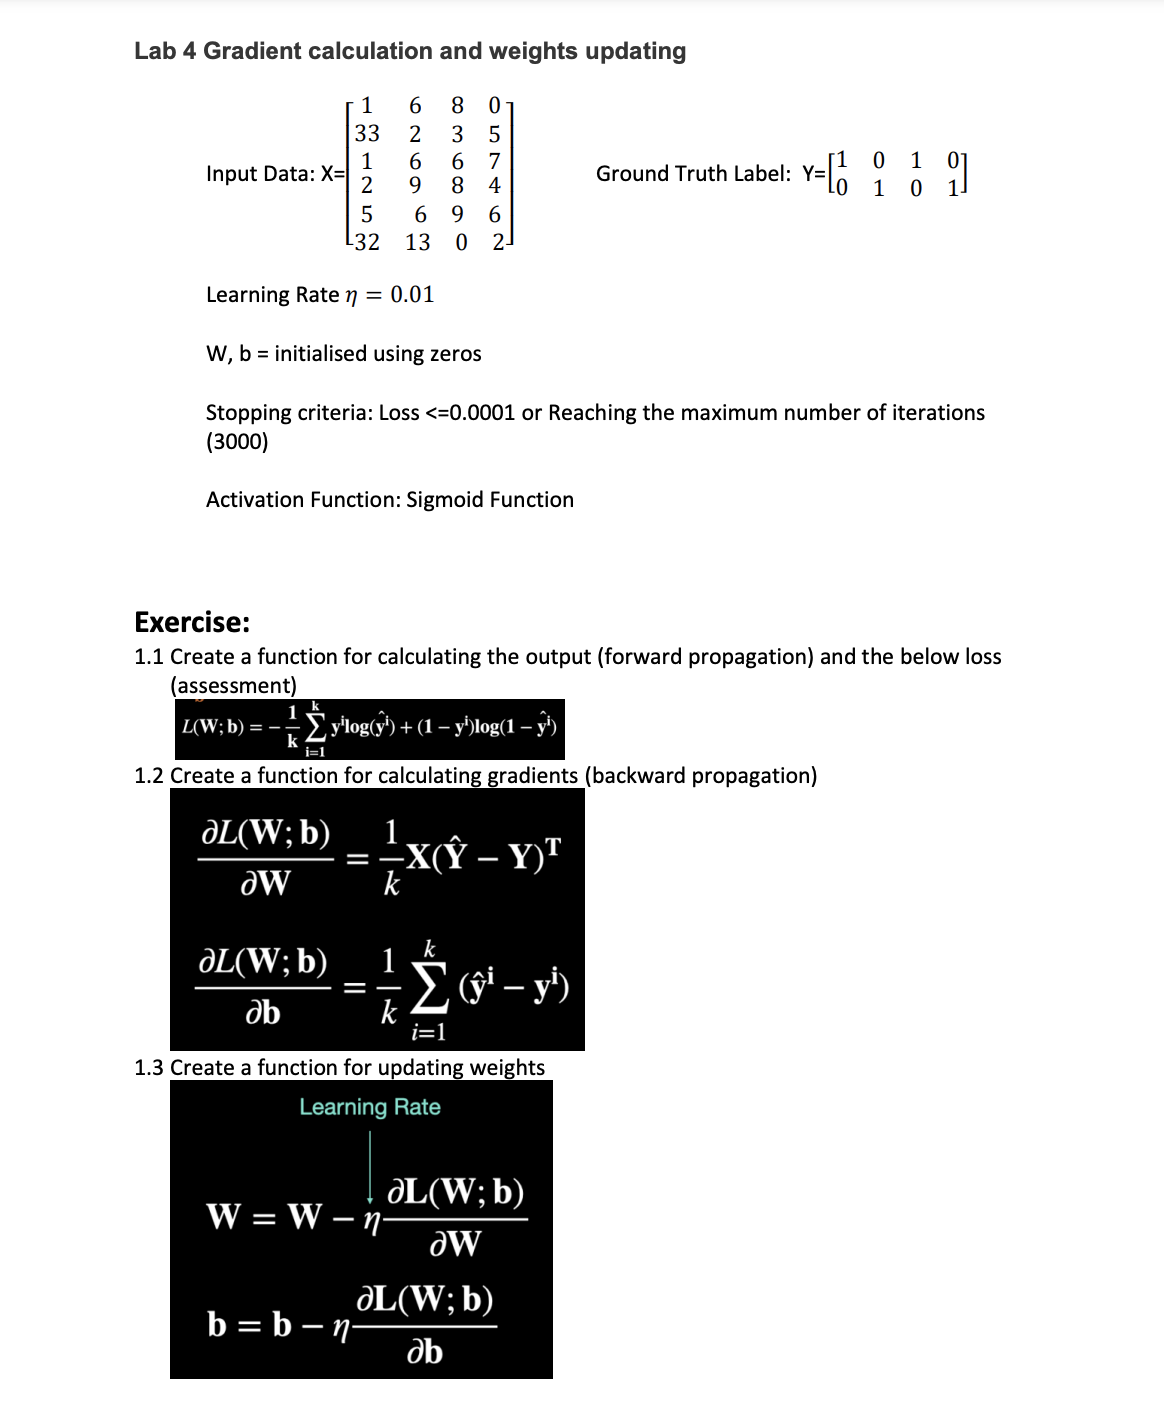

# IMPORT LIBRARY

In [ ]:
import numpy as np

# IMPORT DATA

In [ ]:
x = np.array([
                  [1,6,8,0],
                  [33,2,3,5],
                  [1,6,6,7],
                  [2,9,8,4],
                  [5,6,9,6],
                  [32,13,0,2]
])
y = np.array([
                   [1,0,1,0],
                   [0,1,0,1]
])

weight = np.full((6,2),0.01)
bias = np.full((2,1),0.01)


print("input:\n",x)
print("output:\n",y)
print("weight:\n",weight)
print("bias:\n",bias)

input:
 [[ 1  6  8  0]
 [33  2  3  5]
 [ 1  6  6  7]
 [ 2  9  8  4]
 [ 5  6  9  6]
 [32 13  0  2]]
output:
 [[1 0 1 0]
 [0 1 0 1]]
weight:
 [[0.01 0.01]
 [0.01 0.01]
 [0.01 0.01]
 [0.01 0.01]
 [0.01 0.01]
 [0.01 0.01]]
bias:
 [[0.01]
 [0.01]]


# FORWARD_PROPOGATION

In [ ]:
def sigmoid(z):
  sigmoid = 1/(1+np.exp(-z))
  print('Sigmoid :', sigmoid)
  return sigmoid

In [ ]:
def forward_propogation(w,x,b):
 z = np.dot(w.T, x) + b
 y_hat = sigmoid(z)
 print('Y_Hat :', y_hat)
 return y_hat

In [ ]:
def log_loss(y,y_hat):
  loss =  -np.mean((y * np.log(y_hat)) + ((1-y) * np.log(1-y_hat)))
  print('Loss :', loss)
  return loss

In [ ]:
y_hat = forward_propogation(weight,x,bias)
y_hat

Sigmoid : [[0.6791787  0.60587367 0.58661758 0.5621765 ]
 [0.6791787  0.60587367 0.58661758 0.5621765 ]]
Y_Hat : [[0.6791787  0.60587367 0.58661758 0.5621765 ]
 [0.6791787  0.60587367 0.58661758 0.5621765 ]]


array([[0.6791787 , 0.60587367, 0.58661758, 0.5621765 ],
       [0.6791787 , 0.60587367, 0.58661758, 0.5621765 ]])

In [ ]:
log_loss = log_loss(y,y_hat)

Loss : 0.721819090998048


# BACKWARD PROPAGATION

In [ ]:
learning_rate = 0.01
iterations = 3000
loss_limit = 0.0001

In [ ]:
def gradients(w,b,x,y,y_hat):
  m = x.shape[0]
  w_derivative = (1/m)*(np.dot( x,(y_hat - y).T ))
  b_derivative = (1/m)*np.sum(y_hat - y)
  print('W Derivative {}, B Derivative'.format(w_derivative,b_derivative))
  return w_derivative, b_derivative

In [ ]:
backward_propagation = gradients(weight,bias,x,y,y_hat)
backward_propagation

W Derivative [[ 1.22689018e-03  5.01226890e-01]
 [-1.30077006e+00  3.53256328e+00]
 [ 7.94893615e-01 -2.05106385e-01]
 [ 6.25477842e-01  1.25477842e-01]
 [ 2.80625454e-01  6.13958787e-01]
 [-2.10928489e-01  2.62240484e+00]], B Derivative


(array([[ 1.22689018e-03,  5.01226890e-01],
        [-1.30077006e+00,  3.53256328e+00],
        [ 7.94893615e-01, -2.05106385e-01],
        [ 6.25477842e-01,  1.25477842e-01],
        [ 2.80625454e-01,  6.13958787e-01],
        [-2.10928489e-01,  2.62240484e+00]]), 0.14461548247009393)

# UPDATION WEIGHT

In [ ]:
def weight_bias_updation(w_derivative,b_derivative,learning_rate,weight,bias):
  weight = weight - (learning_rate * w_derivative)
  bias = bias - (learning_rate * b_derivative)
  print('New Weight : {}\n, New Bias :{}'.format(weight,bias))
  return weight,bias

In [ ]:
weight_bias_var = weight_bias_updation(backward_propagation[0],backward_propagation[1],learning_rate,weight,bias)
weight_bias_var

New Weight : [[ 0.00998773  0.00498773]
 [ 0.0230077  -0.02532563]
 [ 0.00205106  0.01205106]
 [ 0.00374522  0.00874522]
 [ 0.00719375  0.00386041]
 [ 0.01210928 -0.01622405]]
, New Bias :[[0.00855385]
 [0.00855385]]


(array([[ 0.00998773,  0.00498773],
        [ 0.0230077 , -0.02532563],
        [ 0.00205106,  0.01205106],
        [ 0.00374522,  0.00874522],
        [ 0.00719375,  0.00386041],
        [ 0.01210928, -0.01622405]]), array([[0.00855385],
        [0.00855385]]))